In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np

%matplotlib inline

In [99]:
with open('mta_clean_by_day.pickle','rb') as read_file:
    mta_by_day = pickle.load(read_file)

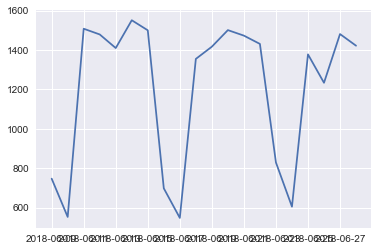

In [100]:
# plot one turnstile
(
plt.plot(mta_by_day[(mta_by_day['SCP']=='02-00-00')
        & (mta_by_day['STATION']=='59 ST')]['DAY']
        ,mta_by_day[(mta_by_day['SCP']=='02-00-00')
        & (mta_by_day['STATION']=='59 ST')]['DAILY COUNTS'])
)    

In [101]:
# Sum the turnstile counts to station daily counts
count_by_station = mta_by_day.groupby(['STATION','DIVISION','DAY','NAME OF DAY','WEEK NUMBER'])['DAILY COUNTS','DAILY EXITS'].sum().reset_index()


In [102]:
count_by_station.head(10)

,STATION,DIVISION,DAY,NAME OF DAY,WEEK NUMBER,DAILY COUNTS,DAILY EXITS
0,1 AV,BMT,2018-06-09,Saturday,24,18889.0,20128.0
1,1 AV,BMT,2018-06-10,Sunday,24,14367.0,16176.0
2,1 AV,BMT,2018-06-11,Monday,24,21548.0,23359.0
3,1 AV,BMT,2018-06-12,Tuesday,24,22581.0,23998.0
4,1 AV,BMT,2018-06-13,Wednesday,24,22684.0,24213.0
5,1 AV,BMT,2018-06-14,Thursday,24,23746.0,25031.0
6,1 AV,BMT,2018-06-15,Friday,24,22554.0,23736.0
7,1 AV,BMT,2018-06-16,Saturday,25,17680.0,19363.0
8,1 AV,BMT,2018-06-17,Sunday,25,13188.0,15384.0
9,1 AV,BMT,2018-06-18,Monday,25,20441.0,22704.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a102eb630>,
      dtype=object)

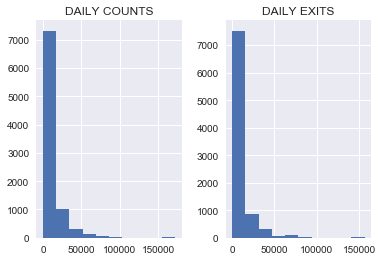

In [103]:
count_by_station.hist(['DAILY COUNTS','DAILY EXITS'])

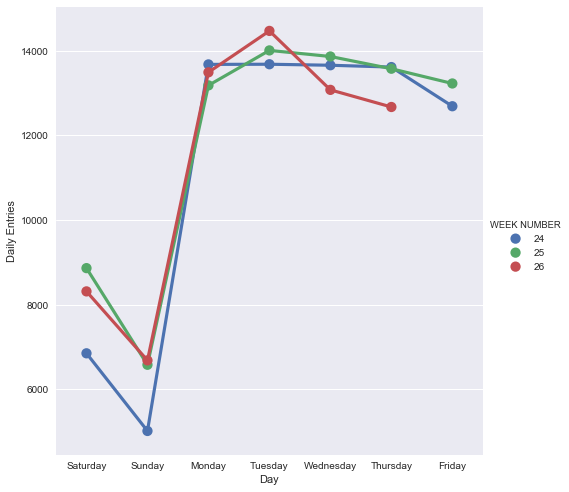

In [104]:
# Select one station and plot by week
mask = (count_by_station['STATION'] == '86 ST') & (count_by_station['DIVISION'] == 'BMT')
sns.set()
fig = sns.factorplot(x='NAME OF DAY',y='DAILY COUNTS',hue ='WEEK NUMBER', size=7, data = count_by_station[mask])
fig.set_axis_labels('Day','Daily Entries')

In [105]:
#create seperate data frames for weekend and weeday
def weekday(row):
    if row['NAME OF DAY'] == 'Saturday' or row['NAME OF DAY']=='Sunday':
        return 'NOT WORKDAY'
    else:
        return 'WORKDAY'

In [106]:
count_by_station['WORKDAY'] = count_by_station.apply(weekday, axis =1 )

In [107]:
count_by_station.head()

,STATION,DIVISION,DAY,NAME OF DAY,WEEK NUMBER,DAILY COUNTS,DAILY EXITS,WORKDAY
0,1 AV,BMT,2018-06-09,Saturday,24,18889.0,20128.0,NOT WORKDAY
1,1 AV,BMT,2018-06-10,Sunday,24,14367.0,16176.0,NOT WORKDAY
2,1 AV,BMT,2018-06-11,Monday,24,21548.0,23359.0,WORKDAY
3,1 AV,BMT,2018-06-12,Tuesday,24,22581.0,23998.0,WORKDAY
4,1 AV,BMT,2018-06-13,Wednesday,24,22684.0,24213.0,WORKDAY


# TOTALS BY STATION / DIVISION 

In [108]:
totals_by_station = count_by_station.groupby(['STATION','DIVISION'])['DAILY COUNTS','DAILY EXITS'].sum().reset_index()

In [110]:
totals_by_station = totals_by_station.sort_values('DAILY COUNTS', ascending = False)
totals_by_station.rename(columns = {'DAILY COUNTS':'TOTAL COUNT','DAILY EXITS':'TOTAL EXITS'}, inplace =True)
totals_by_station.head(10)

,STATION,DIVISION,TOTAL COUNT,TOTAL EXITS
287,GRD CNTRL-42 ST,IRT,2617020.0,2446281.0
89,42 ST-PORT AUTH,IND,1830374.0,1381056.0
418,TIMES SQ-42 ST,IRT,1605614.0,1340308.0
81,34 ST-PENN STA,IRT,1486414.0,1210294.0
80,34 ST-PENN STA,IND,1422052.0,1260938.0
78,34 ST-HERALD SQ,IND,1381388.0,1279008.0
22,14 ST-UNION SQ,BMT,1330926.0,1145367.0
139,86 ST,IRT,1210198.0,1097619.0
278,FULTON ST,IND,1133014.0,632621.0
110,59 ST COLUMBUS,IND,1010398.0,815947.0


In [111]:
top_10 = totals_by_station.head(10)

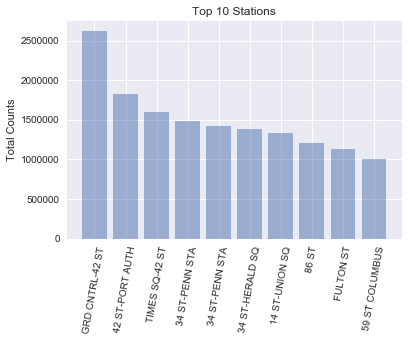

In [113]:
y_pos = np.arange(len(top_10['STATION']))

plt.bar(y_pos,top_10['TOTAL COUNT'], align='center', alpha=0.5)
plt.xticks(y_pos, top_10['STATION'], rotation = 80)
plt.ylabel('Total Counts')
plt.title('Top 10 Stations')
 
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a10893be0>,
      dtype=object)

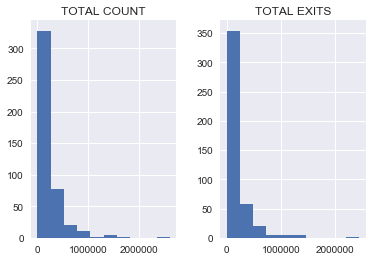

In [114]:
totals_by_station.hist()

In [115]:
with open('mta_counts_total.pickle', 'wb') as to_write:
    pickle.dump(totals_by_station, to_write)

# ADDITIONAL INVESTIGATIONS

In [116]:
top_10_by_day = pd.merge(top_10,count_by_station, how = 'left', on = ['STATION','DIVISION'])

In [79]:
top10_avg_day = top_10_by_day.groupby(['STATION','DIVISION','NAME OF DAY']).mean()

In [90]:
top10_avg_day = top10_avg_day.drop(['WEEK NUMBER'],axis =1 , errors = 'ignore').reset_index()
top10_avg_day.head()

,STATION,DIVISION,NAME OF DAY,DAILY COUNTS_x,DAILY EXITS_x,DAILY COUNTS_y,DAILY EXITS_y
0,14 ST-UNION SQ,BMT,Friday,1330926.0,1145367.0,74876.500000,65155.500000
1,14 ST-UNION SQ,BMT,Monday,1330926.0,1145367.0,71443.000000,60814.333333
2,14 ST-UNION SQ,BMT,Saturday,1330926.0,1145367.0,49376.000000,44854.333333
3,14 ST-UNION SQ,BMT,Sunday,1330926.0,1145367.0,43842.333333,38242.000000
4,14 ST-UNION SQ,BMT,Thursday,1330926.0,1145367.0,75337.000000,64363.666667


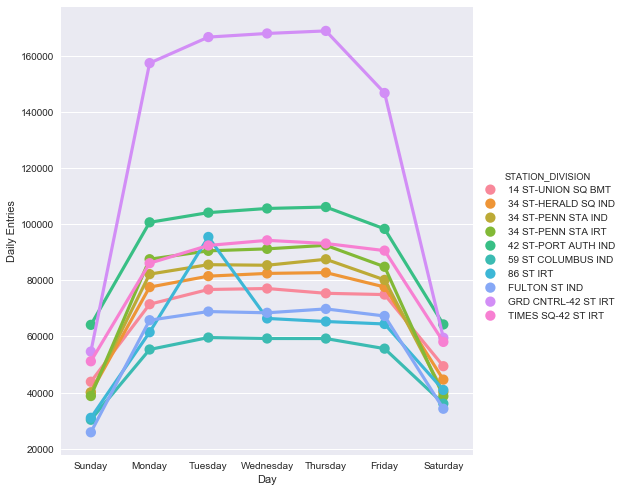

In [120]:
sns.set()
top10_avg_day['STATION_DIVISION'] = top10_avg_day['STATION']+' '+ top10_avg_day['DIVISION']
fig = sns.factorplot(x='NAME OF DAY',y='DAILY COUNTS_y',hue ='STATION_DIVISION', size=7, data = top10_avg_day, order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
fig.set_axis_labels('Day','Daily Entries')